In [107]:
%matplotlib inline
from copy import copy
import itertools

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [7]:
sample_text = '([])[[][[([()(]])(]]][[]]]]]([]([)]]([())[)(]][)('

In [9]:
check_files = [f[10:] for f in os.listdir("cv") if 'cellstates' in f]
#prototyping
check_files = ['_lm_test3_epoch41.21_1.0969.txt']


#need to modify for > 1 sample
#curr_cellstates = pd.read_csv('cellstates'+check_files[0], header=None)
curr_probs = pd.read_csv('probabilities'+check_files[0], header=None)
curr_probs.columns = ['1','2','3','4']
curr_probs = curr_probs.apply(lambda x: np.exp(x))
curr_sample = pd.read_csv('sample'+check_files[0], header=None).T
curr_sample.columns = ['s']

In [34]:
samples = []
for n in xrange(2,5):
    for i in ['cv'+str(n)+'/'+f for f in os.listdir("cv"+str(n)) if 'sample' in f and not 'test' in f and 'lstm' in f]:
        configs = i[19:-4].split('_')
        with open(i) as cf:
            curr_string = cf.read()
            configs.append(curr_string)
            print curr_string
            
        if not '(' in configs[-1]:
            samples.append(tuple(configs))

2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,2,3,2,3,4,1,3,2,4,3,2,2,1,4,4,1,1,2,3,4,3,3,2,3,4,4,
2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,2,3,2,3,4,1,3,2,4,3,2,2,1,4,4,1,1,2,3,4,3,3,2,3,4,4,
2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,2,3,2,3,4,1,3,2,4,3,2,2,1,4,4,1,1,2,3,4,3,3,2,3,4,4,
2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,2,3,2,3,4,1,3,2,4,3,2,2,1,4,4,1,1,2,3,4,3,3,2,3,4,4,
2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,2,3,2,3,4,1,3,2,4,3,2,2,1,4,4,1,1,2,3,4,3,3,2,3,4,4,
2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,2,3,2,3,4,1,3,2,4,3,2,2,1,4,4,1,1,2,3,4,3,3,2,3,4,4,
2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,2,3,2,3,4,1,3,2,4,3,2,2,1,4,4,1,1,2,3,4,3,3,2,3,4,4,
2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,2,3,2,3,4,1,3,2,4,3,2,2,1,4,4,1,1,2,3,4,3,3,2,3,4,4,
2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,2,3,2,3,4,1,3,2,4,3,2,2,1,4,4,1,1,2,3,4,3,3,2,3,4,4,
2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,2,3,2,3,4,1,3,2,4,3,2,2,1,4,4,1,1,2,3,4,3,3,2,3,4,4,
2,2,2,2,2,

In [47]:
df = pd.DataFrame(samples)
df.columns = ['depth', 'cell', 'epoch', 'loss', 'sample']
df['epoch'] = df.epoch.apply(lambda x: float(x[5:]))

In [98]:
def get_correct_perc(some_text):
    depth_array = []
    mistake_count = 0
    total_count = len(some_text)
    for c in some_text:
        if c == "(" or c == "[":
            depth_array.append(c)
        else:
            try:
                curr_open = depth_array.pop()
                if (curr_open == "(" and c == ")") or (curr_open == "[" and c == "]"):
                    pass
                else:
                    mistake_count +=1
            except:
                mistake_count +=1
    mistake_count+=len(depth_array)
    return  (1-mistake_count/float(total_count))*100
str(get_correct_perc(sample_text))

'73.4693877551'

In [99]:
mapping = {1:'(',
           2:')',
           3:'[',
           4:']'}
def get_string(sample):
    cleaned_s = sample.split(',')[:-1]
    transformed = [mapping[int(i)] for i in cleaned_s]
    return ''.join(transformed)
        

df['transformed'] = df['sample'].apply(get_string)


In [100]:
def get_best_mapping(sample):
    chars = ['(', ')', '[', ']']
    trans = ''
    perc = 0
    for i in itertools.permutations([1, 2, 3, 4]):
        curr_mapping = {i[j]:chars[j] for j in xrange(4)}
        curr_trans = ''.join([curr_mapping[int(i)] for i in sample.split(',')[:-1]])
        curr_score = get_correct_perc(curr_trans)
        if curr_score > perc:
            trans = curr_trans
            perc = curr_score
    return trans
df['transformed'] = df['sample'].apply(get_best_mapping)
df['score'] = df['transformed'].apply(get_correct_perc)

In [103]:
#mean min max all have interesting properties!
df.groupby(['depth','cell']).agg(lambda x: x.max())

epoch    loss                                             sample  \
depth cell                                                                     
10    1     49.86  1.3865  2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,...   
      2     49.86  1.3863  2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,...   
      3     49.86  1.3863  2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,...   
      4     49.86  1.3863  2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,...   
      5     49.86  1.3863  2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,...   
      6     49.86  1.3863  2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,...   
      7     49.86  1.3863  2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,...   
      8     49.86  1.3861  2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,...   
11    1     49.79  1.3866  1,1,3,2,2,1,3,1,1,1,3,4,2,3,1,3,4,2,4,3,1,1,1,...   
      2     49.79  1.3864  1,1,3,2,2,1,3,1,1,1,3,4,2,3,1,3,4,2,4,3,1,1,1,...   
      3     49.79  1.3862  1,1,3,2,2,1,3,1,1,1,3,4,2,3,1,3,4,2,4,3,1,1,1,...   
      4     49.79  1.3863  1,1,3,2,2,1,3,1,1,1,3,4,2,3,1,3,4,2,4,3,1,1,1,...   
      5     49.79  1.3863  1,1,3,2,2,1,3,1,1,1,3,4,2,3,1,3,4,2,4,3,1,1,1,...   
      6     49.79  1.3863  1,1,3,2,2,1,3,1,1,1,3,4,2,3,1,3,4,2,4,3,1,1,1,...   
      7     49.79  1.3863  1,1,3,2,2,1,3,1,1,1,3,4,2,3,1,3,4,2,4,3,1,1,1,...   
      8     49.79  1.3862  1,1,3,2,2,1,3,1,1,1,3,4,2,3,1,3,4,2,4,3,1,1,1,...   
5     1     49.79  1.3864  1,4,3,2,4,4,3,4,4,1,4,1,2,1,3,3,2,1,3,3,3,4,4,...   
      2     49.79  1.3863  1,4,3,2,4,4,3,4,4,1,4,1,2,1,3,3,2,1,3,3,3,4,4,...   
      3     49.79  1.3863  1,4,3,2,4,4,3,4,4,1,4,1,2,1,3,3,2,1,3,3,3,4,4,...   
      4     49.79  1.3862  1,4,3,2,4,4,3,4,4,1,4,1,2,1,3,3,2,1,3,3,3,4,4,...   
      5     49.79  1.3863  1,4,3,2,4,4,3,4,4,1,4,1,2,1,3,3,2,1,3,3,3,4,4,...   
      6     49.79  1.3862  1,4,3,2,4,4,3,4,4,1,4,1,2,1,3,3,2,1,3,3,3,4,4,...   
      7     49.79  1.3861  1,4,3,2,4,4,3,4,4,1,4,1,2,1,3,3,2,1,3,3,3,4,4,...   
      8     49.79  1.3862  1,4,3,2,4,4,3,4,4,1,4,1,2,1,3,3,2,1,3,3,3,4,4,...   
      9     44.84  1.3859  1,4,3,2,4,4,3,4,4,1,4,1,2,1,3,3,2,1,3,3,3,4,4,...   
6     1     49.72  1.3864  4,1,1,4,2,2,4,1,3,4,1,4,1,4,4,4,3,2,3,3,2,2,1,...   
      2     49.72  1.3863  4,1,1,4,2,2,4,1,3,4,1,4,1,4,4,4,3,2,3,3,2,2,1,...   
      3     49.72  1.3863  4,1,1,4,2,2,4,1,3,4,1,4,1,4,4,4,3,2,3,3,2,2,1,...   
      4     49.72  1.3863  4,1,1,4,2,2,4,1,3,4,1,4,1,4,4,4,3,2,3,3,2,2,1,...   
      5     49.72  1.3863  4,1,1,4,2,2,4,1,3,4,1,4,1,4,4,4,3,2,3,3,2,2,1,...   
      6     49.72  1.3862  4,1,1,4,2,2,4,1,3,4,1,4,1,4,4,4,3,2,3,3,2,2,1,...   
      7     36.27  1.3862  4,1,1,4,2,2,4,1,3,4,1,4,1,4,4,4,3,2,3,3,2,2,1,...   
      8     49.72  1.3862  4,1,1,4,2,2,4,1,3,4,1,4,1,4,4,4,3,2,3,3,2,2,1,...   
7     1     49.90  1.3864  4,4,2,3,1,1,3,2,3,2,4,1,1,1,4,1,1,2,3,4,2,4,3,...   
      2     49.90  1.3863  4,4,2,3,1,1,3,2,3,2,4,1,1,1,4,1,1,2,3,4,2,4,3,...   
      3     49.90  1.3863  4,4,2,3,1,1,3,2,3,2,4,1,1,1,4,1,1,2,3,4,2,4,3,...   
      4     49.90  1.3863  4,4,2,3,1,1,3,2,3,2,4,1,1,1,4,1,1,2,3,4,2,4,3,...   
      5     49.90  1.3862  4,4,2,3,1,1,3,2,3,2,4,1,1,1,4,1,1,2,3,4,2,4,3,...   
      6     49.90  1.3862  4,4,2,3,1,1,3,2,3,2,4,1,1,1,4,1,1,2,3,4,2,4,3,...   
      8     49.90  1.3862  4,4,2,3,1,1,3,2,3,2,4,1,1,1,4,1,1,2,3,4,2,4,3,...   
8     1     49.77  1.3864  1,3,4,4,4,1,4,3,1,4,1,3,3,4,3,3,2,4,1,4,2,2,3,...   
      2     49.77  1.3863  1,3,4,4,4,1,4,3,1,4,1,3,3,4,3,3,2,4,1,4,2,2,3,...   
      3     49.77  1.3864  1,3,4,4,4,1,4,3,1,4,1,3,3,4,3,3,2,4,1,4,2,2,3,...   
      4     49.77  1.3863  1,3,4,4,4,1,4,3,1,4,1,3,3,4,3,3,2,4,1,4,2,2,3,...   
      5     49.77  1.3864  1,3,4,4,4,1,4,3,1,4,1,3,3,4,3,3,2,4,1,4,2,2,3,...   
      6     49.77  1.3863  1,3,4,4,4,1,4,3,1,4,1,3,3,4,3,3,2,4,1,4,2,2,3,...   
      8     49.77  1.3862  1,3,4,4,4,1,4,3,1,4,1,3,3,4,3,3,2,4,1,4,2,2,3,...   
9     1     49.84  1.3864  3,2,3,4,2,1,4,2,1,2,4,4,2,4,4,4,3,1,1,3,2,2,2,...   
      2     

In [65]:
df[df['epoch']>49.8].sort()

,depth,cell,epoch,loss,sample,transformed,score
191,10,5,49.86,1.0936,"2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,...",]]]]](([[(((()([[(())()][][)([])[]]())((][)[[][)),79.591837
404,10,6,49.86,1.0857,"2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,...",]]]]](([[(((()([[(())()][][)([])[]]())((][)[[][)),79.591837
617,10,7,49.86,1.0748,"2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,...",]]]]](([[(((()([[(())()][][)([])[]]())((][)[[][)),79.591837
2311,7,5,49.90,1.0804,"4,4,2,3,1,1,3,2,3,2,4,1,1,1,4,1,1,2,3,4,2,4,3,...",[[()]])()([]]][]]()[([))(]))])[(())[[](()[[[()(([,79.591837
2518,7,6,49.90,1.0775,"4,4,2,3,1,1,3,2,3,2,4,1,1,1,4,1,1,2,3,4,2,4,3,...",[[()]])()([]]][]]()[([))(]))])[(())[[](()[[[()(([,79.591837
3124,9,6,49.84,1.0853,"3,2,3,4,2,1,4,2,1,2,4,4,2,4,4,4,3,1,1,3,2,2,2,...",)()[(][(]([[([[[)]])((([]]])[())([](([))([())([[),79.591837
3335,10,1,49.86,1.2387,"2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,...",]]]]](([[(((()([[(())()][][)([])[]]())((][)[[][)),79.591837
3548,10,2,49.86,1.1520,"2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,...",]]]]](([[(((()([[(())()][][)([])[]]())((][)[[][)),79.591837
3761,10,5,49.86,1.0936,"2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,...",]]]]](([[(((()([[(())()][][)([])[]]())((][)[[][)),79.591837
3974,10,6,49.86,1.0857,"2,2,2,2,2,1,1,3,3,1,1,1,1,4,1,3,3,1,1,4,4,1,4,...",]]]]](([[(((()([[(())()][][)([])[]]())((][)[[][)),79.591837


In [110]:
[''.join([random.choice(mapping.values()) for i in xrange(50)]) for j in xrange(20)]

['(]]()[][]]())[)]])()]()[([)[([)][][)]])[(]]]]()]][',
 ']]][(()((])][[[]())([((])[)[(]())([][](][())[)((](',
 '])([]]([)[]]][)([]()]]])[((())][[))([()])[[])((])(',
 '[]([]][]([()]]])[][[((])([([][(]])([((([]][][)[())',
 '([)()]((](])]]]([))[))(]))])(())(()()[][()))([[[])',
 ')[(][(])()])[)](((())][)[)]((([[[([]]]][](]])(([][',
 '][((]]]]))([(]))][][](]][)]()[]]]])](([])()((([(])',
 ']))(([]][[)[[[)[][])(][(])[[][)[[(([[)(][[[))[]([]',
 ']][))]][))[](]])[[(]))[)([()))[(][[))((()[]((([[)[',
 ')(())]([[]][(])[)[]))[]][)(])]][[[[(())[])[[]]]][[',
 '))([[])](())(]))((()])]]]]]])([)))(((])](][])]])(]',
 '[[]([[]])((])][[][])[[))]((]))(()])[]][]()))(([)((',
 '[(((]]([]]][]([]][([)[[))]())])]]]][([])](][)[]((]',
 '((]]((]]))())])()(([]))()]()[[)])[[)]])(][)]])())(',
 '[))]]]([)]())()[([][)([)[)[)](]][)[]([)([))([(]([[',
 '][[[[[[(((][]](][]]([(]]][]([([[()]())[[][(()()]](',
 ')])(([[)((](]])(](())[[()[(]))][[()]][]([][(](()([',
 ']][([][)][)[[)[()(())()][]())[])))[[[[(]]]](]]]]](',
 '[[)[[]](

In [122]:
for o in os.listdir('out'):
    if 'lstm' in o:
        with open('out/'+o, 'r') as f:
            lines = f.read().splitlines()
            lines = lines[5]
            depth =  o.split('_')[1]
            cs =  o.split('_')[2][:-4]
            print depth, cs, get_correct_perc(lines)

10 1 78.05
10 2 82.0
10 3 85.4
10 4 84.2
11 1 76.1
11 2 78.35
11 3 82.95
5 1 75.65
5 2 77.6
5 3 81.15
5 4 85.15
6 1 75.75
6 2 80.45
6 3 81.35
6 4 85.6
7 1 78.0
7 2 81.05
7 3 85.2
7 4 88.75
8 1 76.4
8 2 80.05
8 3 81.8
8 4 86.45
9 1 76.25
9 2 80.25
9 3 82.45
9 4 86.1


In [134]:
def get_depth_counts(some_text):
    depth_array = []
    depths = []
    depth = 0
    for c in some_text:
        if c == "(" or c == "[":
            depth_array.append(c)
            depth +=1
            depths.append(depth)
        else:
            try:
                curr_open = depth_array.pop()
                #depths.append(depth)
                depth -= 1
            except:
                pass
            
                #depths.append(depth)
    return depths

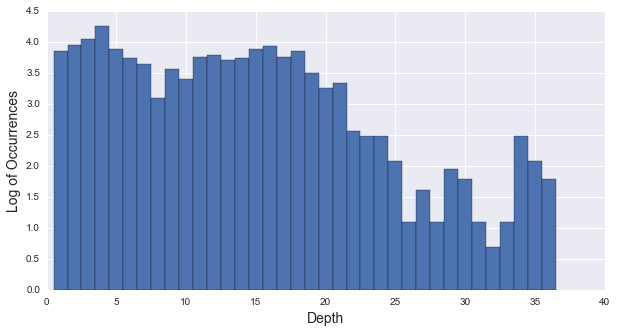

In [160]:
with open('out/lstm_8_8.txt', 'r') as f:
    lines = f.read().splitlines()
    lines = lines[5]
counts = get_depth_counts(lines)
counts = np.log(np.bincount(counts))
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(xrange(len(counts)), counts, width=1, align='center')

#plt.plot(np.random.normal(15, 10))
#ax.set(xticks=range(28), xlim=[.5, 23.5])
plt.xlabel("Depth", fontsize=14)
plt.ylabel("Log of Occurrences", fontsize=14)
plt.show()

In [161]:
def parse_depency_range(some_string):
    depth = 0
    ranges_count = {l+1:[] for l in xrange(11)}
    ranges = []
    depths = []  
    opposites = {"(":")", "[":"]"}
    for c in some_string:
        if c == "(" or c == "[":
            depth+=1   
            depths.append(c)
            ranges.append(0)
            ranges = [x+1 for x in ranges]
        else:
            try:
                depths.pop()
                curr_range = ranges.pop()
            except:
                pass
            else:
                try:
                    ranges_count[len(depths)+1].append(curr_range)
                except:
                    ranges_count[len(depths)+1] = [curr_range]
                ranges = [x+1 for x in ranges]
                
                depth-=1  
    while ranges:
        depths.pop()
        curr_range = ranges.pop()
        try:
            ranges_count[len(depths)+1].append(curr_range)
        except:
            ranges_count[len(depths)+1] = [curr_range]
        ranges = [x+1 for x in ranges]
        
    for i, v in ranges_count.iteritems():
        print "For Depth {0}, average dependency length is {1:.4g} with std {2:.4g} in {3} occurrences".format(i, np.mean(v), np.std(v), len(v))
    
    return ranges_count
dep_lengths = parse_depency_range(lines)

For Depth 1, average dependency length is 41.26 with std 145 in 47 occurrences
For Depth 2, average dependency length is 35.38 with std 131.4 in 52 occurrences
For Depth 3, average dependency length is 30.37 with std 117 in 57 occurrences
For Depth 4, average dependency length is 22.58 with std 104.8 in 71 occurrences
For Depth 5, average dependency length is 30.27 with std 124.2 in 49 occurrences
For Depth 6, average dependency length is 33.14 with std 132.2 in 42 occurrences
For Depth 7, average dependency length is 34.53 with std 135.2 in 38 occurrences
For Depth 8, average dependency length is 56.91 with std 172.7 in 22 occurrences
For Depth 9, average dependency length is 34.14 with std 103.8 in 35 occurrences
For Depth 10, average dependency length is 37.67 with std 92.27 in 30 occurrences
For Depth 11, average dependency length is 24.58 with std 71.23 in 43 occurrences
For Depth 12, average dependency length is 22.05 with std 66.46 in 44 occurrences
For Depth 13, average depende

In [169]:
x_v = np.linspace(1,36,36)
l_v = []
st_v = []
for i, v in dep_lengths.iteritems():
    l_v.append(np.log(np.mean(v)))
    st_v.append(np.log(np.std(v)))
    

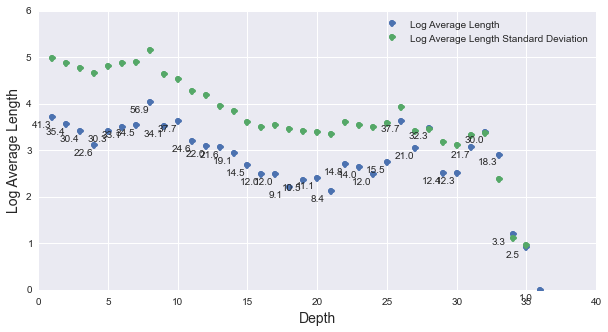

In [170]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(x_v, l_v, 'o', label="Log Average Length")
plt.plot(x_v, st_v, 'o', label="Log Average Length Standard Deviation")
for i,j in zip(x_v,l_v):
    ax.annotate('%.1f' %np.exp(j), xy=(i,j), xytext=(-20,-10), textcoords='offset points')
plt.legend()
plt.xlabel("Depth", fontsize=14)
plt.ylabel("Log Average Length", fontsize=14)
plt.show()